# Network Analytics

## Networkx
* [Netwokx](https://networkx.github.io/documentation/networkx-1.9/index.html) is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and function of complex networks.
* Uses the different methods to manipulate a graph
* Uses methods of centrality from graph theory
* Allows to create basic network plots

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

## Graph Essentials

In [2]:
g = nx.Graph()

One node at a time

In [3]:
g.add_node(1)

A list of nodes

In [4]:
g.add_nodes_from([2 ,3])

A container of nodes

In [5]:
h = nx.path_graph(10)
g.add_nodes_from(h)

In [6]:
g.nodes()

NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8, 9))

Remove node of the graph

In [7]:
g.remove_node(0)

Single edge

In [8]:
g.add_edge(1,2)

List of edges

In [9]:
g.add_edges_from([(1 ,2) ,(1 ,3)])

Container of edges

In [10]:
g.add_edges_from(h.edges())

In [11]:
g.edges()

EdgeView([(1, 2), (1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

Remove edge of the graph

In [12]:
g.remove_edge(1,2)

In [11]:
g.edges()

EdgeView([(1, 2), (1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

NetworkX is not primarily a graph drawing package but it provides basic drawing
capabilities by using matplotlib. 

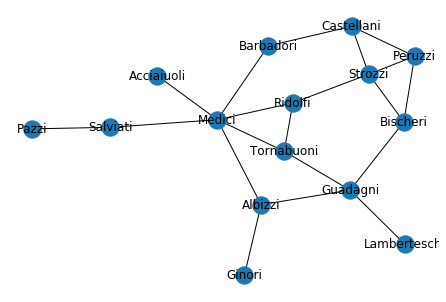

In [56]:
nx.draw(g, with_labels=True)

Precomputed Functions

In [14]:
shortest = nx.shortest_path(g)

In [15]:
shortest[2][0]

[2, 3, 1, 0]

In [16]:
g.number_of_nodes() # also g.order()

10

In [17]:
g.number_of_edges() # also g.size()

9

In [18]:
g.degree(3)

3

In [19]:
[n for n in g.neighbors(3)]

[1, 2, 4]

Any NetworkX graph behaves like a Python dictionary with nodes as primary keys (only for access!)

In [20]:
g.add_node(0, time='5pm')
g.node[0]['time']

'5pm'

The special edge attribute ’weight’ should always be numeric and holds values used by
algorithms requiring weighted edges. 

In [21]:
g.add_edge(1, 2, weight=4.0)

In [22]:
g[1][2]

{'weight': 4.0}

Many applications require iteration over nodes or over edges: simple and easy in
NetworkX

In [23]:
for node in g.nodes():
    print (node, g.degree(node))

1 3
2 2
3 3
4 2
5 2
6 2
7 2
8 2
9 1
0 1


In [24]:
for edge in g.edges(data=True):
    print (edge)

(1, 3, {})
(1, 0, {})
(1, 2, {'weight': 4.0})
(2, 3, {})
(3, 4, {})
(4, 5, {})
(5, 6, {})
(6, 7, {})
(7, 8, {})
(8, 9, {})


### Diricted Graphs

In [25]:
dg = nx.DiGraph()
dg.add_weighted_edges_from([(1,4,0.5), (3,1,0.75)])

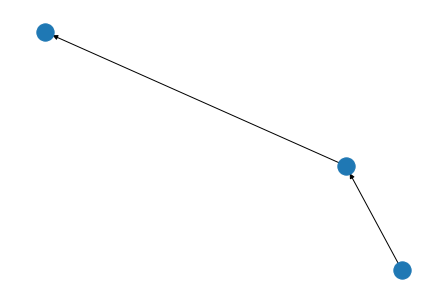

In [26]:
nx.draw(dg)

Some algorithms work only for undirected graphs and others are not well defined for directed graphs.   
To treat a directed graph as undirected for some we should convert it using Graph.to_undirected()

## Retrieving a dataset

In [27]:
g = nx.florentine_families_graph() #small graph

In [28]:
nodes, edges = g.order(), g.size()

In [29]:
avg_deg = float(nodes)/edges

In [30]:
print ('Nodes: {}\nEdges: {}\nAvg Degree: {}'.format(nodes, edges, avg_deg) )

Nodes: 15
Edges: 20
Avg Degree: 0.75


In [31]:
for edge in g.edges(data=True):
    print (edge)

('Acciaiuoli', 'Medici', {})
('Medici', 'Barbadori', {})
('Medici', 'Ridolfi', {})
('Medici', 'Tornabuoni', {})
('Medici', 'Albizzi', {})
('Medici', 'Salviati', {})
('Castellani', 'Peruzzi', {})
('Castellani', 'Strozzi', {})
('Castellani', 'Barbadori', {})
('Peruzzi', 'Strozzi', {})
('Peruzzi', 'Bischeri', {})
('Strozzi', 'Ridolfi', {})
('Strozzi', 'Bischeri', {})
('Ridolfi', 'Tornabuoni', {})
('Tornabuoni', 'Guadagni', {})
('Albizzi', 'Ginori', {})
('Albizzi', 'Guadagni', {})
('Salviati', 'Pazzi', {})
('Bischeri', 'Guadagni', {})
('Guadagni', 'Lamberteschi', {})


## Centrality Measures

In [32]:
def centrality_summary(centrality_output):
    stats = pd.DataFrame([i for i in centrality_output.values()]).describe()
    return stats

**Degree centrality**  
For particular node is the fraction of nodes it is connected to.

In [33]:
degree = nx.degree_centrality(g)

In [34]:
degree

{'Acciaiuoli': 0.07142857142857142,
 'Medici': 0.42857142857142855,
 'Castellani': 0.21428571428571427,
 'Peruzzi': 0.21428571428571427,
 'Strozzi': 0.2857142857142857,
 'Barbadori': 0.14285714285714285,
 'Ridolfi': 0.21428571428571427,
 'Tornabuoni': 0.21428571428571427,
 'Albizzi': 0.21428571428571427,
 'Salviati': 0.14285714285714285,
 'Pazzi': 0.07142857142857142,
 'Bischeri': 0.21428571428571427,
 'Guadagni': 0.2857142857142857,
 'Ginori': 0.07142857142857142,
 'Lamberteschi': 0.07142857142857142}

In [35]:
centrality_summary(degree)

,0
count,15.000000
mean,0.190476
std,0.099805
min,0.071429
25%,0.107143
50%,0.214286
75%,0.214286
max,0.428571


**Closeness centrality**   
Notice that higher values of closeness indicate higher centrality.

For a particular node $u$ is the reciprocal of the sum of the shortest path distances from $u$ to all $n-1$ other nodes. Since the sum of distances depends on the number of nodes in the graph, closeness is normalized by the sum of minimum possible distances $n-1$.  

$C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)}$  
where $d(v, u)$ is the shortest-path distance between $v$ and $u$, and $n$ is the number of nodes in the graph.  

In [36]:
closeness = nx.closeness_centrality(g)

In [37]:
closeness

{'Acciaiuoli': 0.3684210526315789,
 'Medici': 0.56,
 'Castellani': 0.3888888888888889,
 'Peruzzi': 0.3684210526315789,
 'Strozzi': 0.4375,
 'Barbadori': 0.4375,
 'Ridolfi': 0.5,
 'Tornabuoni': 0.4827586206896552,
 'Albizzi': 0.4827586206896552,
 'Salviati': 0.3888888888888889,
 'Pazzi': 0.2857142857142857,
 'Bischeri': 0.4,
 'Guadagni': 0.4666666666666667,
 'Ginori': 0.3333333333333333,
 'Lamberteschi': 0.32558139534883723}

In [38]:
centrality_summary(closeness)

,0
count,15.000000
mean,0.415096
std,0.074844
min,0.285714
25%,0.368421
50%,0.400000
75%,0.474713
max,0.560000


**Betweenness centrality**   
It helps to detect influential nodes  

For a particular node $v$ is the sum of the fraction of all-pairs shortest paths that pass through $v$:  

$c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}$  
where $V$ is the set of nodes, $\sigma(s, t)$ is the number of shortest $(s, t)$-paths, and $\sigma(s, t|v)$ is the number of those paths passing through some node $v$ other than $(s, t)$. If $(s = t)$, $(\sigma(s, t) = 1)$, and if $(v \in {s, t})$, $(\sigma(s, t|v) = 0)$   

In [39]:
betweenness = nx.betweenness_centrality(g)

In [53]:
betweenness

{'Acciaiuoli': 0.0,
 'Medici': 0.521978021978022,
 'Castellani': 0.05494505494505495,
 'Peruzzi': 0.02197802197802198,
 'Strozzi': 0.10256410256410257,
 'Barbadori': 0.09340659340659341,
 'Ridolfi': 0.11355311355311355,
 'Tornabuoni': 0.09157509157509157,
 'Albizzi': 0.21245421245421245,
 'Salviati': 0.14285714285714288,
 'Pazzi': 0.0,
 'Bischeri': 0.1043956043956044,
 'Guadagni': 0.2545787545787546,
 'Ginori': 0.0,
 'Lamberteschi': 0.0}

In [40]:
pagerank = nx.pagerank(g, alpha=0.9)

In [54]:
pagerank

{'Acciaiuoli': 0.0288907572376924,
 'Medici': 0.14815767762161916,
 'Castellani': 0.07046987542816793,
 'Peruzzi': 0.06936095679346557,
 'Strozzi': 0.09102599605689621,
 'Barbadori': 0.050031808323403926,
 'Ridolfi': 0.07112563699417926,
 'Tornabuoni': 0.07251428277949368,
 'Albizzi': 0.07832435802757254,
 'Salviati': 0.05864017590116907,
 'Pazzi': 0.0330540904684662,
 'Bischeri': 0.07024176052701805,
 'Guadagni': 0.09904662496104519,
 'Ginori': 0.030163428818308215,
 'Lamberteschi': 0.028952570061502432}

**Communicability**   
Between pairs of nodes in G is the sum of closed walks of different lengths starting at node u and ending at node v. 

This algorithm uses a spectral decomposition of the adjacency matrix. Let $G=(V,E)$ be a simple undirected graph. Using the connection between the powers of the adjacency matrix and the number of walks in the graph.  

$C(u,v)=\sum_{j=1}^{n}\phi_{j}(u)\phi_{j}(v)e^{\lambda_{j}}$    
where $\phi_{j}(u)$ is the $u\rm{th}$ element of the $j\rm{th}$ orthonormal eigenvector of the adjacency matrix associated with the eigenvalue $\lambda_{j}$.

In [41]:
communicability = nx.communicability(g)

In [55]:
communicability

{'Acciaiuoli': {'Acciaiuoli': 1.8493484166379492,
  'Medici': 2.614221300578799,
  'Castellani': 0.36948441281501965,
  'Peruzzi': 0.20953408514780292,
  'Strozzi': 0.4671322934828184,
  'Barbadori': 0.9236193447883454,
  'Ridolfi': 1.2608954970140651,
  'Tornabuoni': 1.2975131947316112,
  'Albizzi': 1.0411480740072612,
  'Salviati': 0.9026911439750323,
  'Pazzi': 0.240653522954361,
  'Bischeri': 0.2605456112718392,
  'Guadagni': 0.6540613878987086,
  'Ginori': 0.26504034778606433,
  'Lamberteschi': 0.13471992661986537},
 'Medici': {'Acciaiuoli': 2.614221300578799,
  'Medici': 7.2752156711542675,
  'Castellani': 1.6002857234189687,
  'Peruzzi': 1.0971623175696812,
  'Strozzi': 2.100459606248731,
  'Barbadori': 2.9837057133938156,
  'Ridolfi': 4.378866788793227,
  'Tornabuoni': 4.5291781854915705,
  'Albizzi': 3.533323036263572,
  'Salviati': 2.8548748235331596,
  'Pazzi': 0.902691143975031,
  'Bischeri': 1.3307277665293318,
  'Guadagni': 2.7339268066305773,
  'Ginori': 1.04114807400726

### Plotting Betweenness

In [42]:
tradeoff = 0.1
highbetw = {key if value > tradeoff else None for key, value in betweenness.items()}
normbetw = {key if value <= tradeoff else None for key, value in betweenness.items()}

In [43]:
subgraphs = [highbetw,normbetw]
colors = ["lightgreen", "lemonchiffon"] #more.. "skyblue", "mistyrose", "aliceblue"]
def find_color(node):
    for subgraph in subgraphs:
        if node in subgraph:
            return colors[subgraphs.index(subgraph)]
    return "ghostwhite"

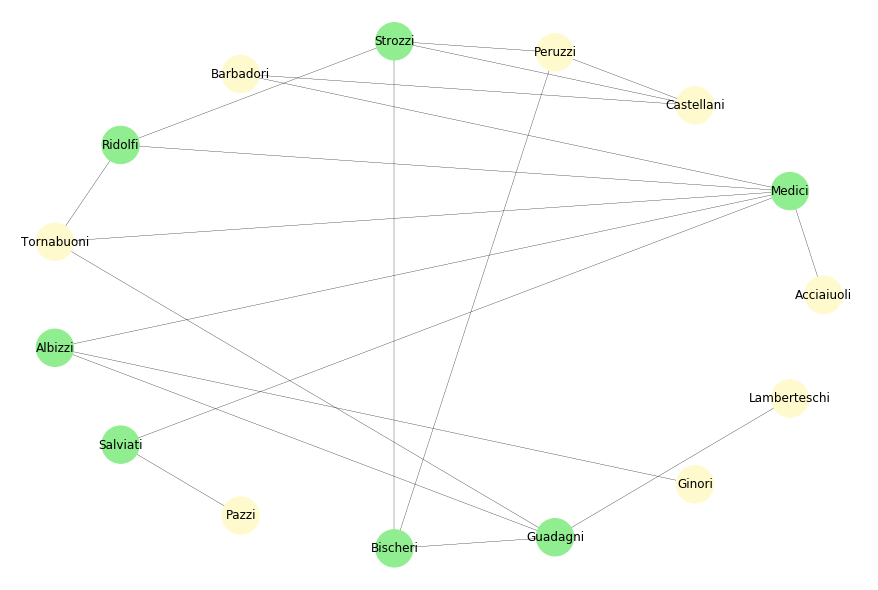

In [57]:
node_colors = [find_color(node) for node in g.nodes()]
plt.figure(figsize=(12, 8))
#nx.draw(g, with_labels=True, node_size=1400, node_color=node_colors, width=0.3)
nx.draw_circular(g, with_labels=True, node_size=1400, node_color=node_colors, width=0.3)

### Graph Properties

As a mathematical object a graph has shape properties by definition

#### Degree Frequency

In [45]:
# Create function to retrieve nodes and its degrees
def degree_table(degree_vector):
    d_table = pd.DataFrame()
    nodes, degrees = [], []
    for node, degree in degree_vector:
        nodes.append(node)
        degrees.append(degree)
    d_table['nodes'] = nodes
    d_table['degrees'] = degrees
    return d_table

In [46]:
degrees = degree_table(g.degree()) #also in_degree(), g.out_degree()
plot_degrees = degrees.groupby('degrees').count().head(10)

Text(0, 0.5, 'Number of nodes')

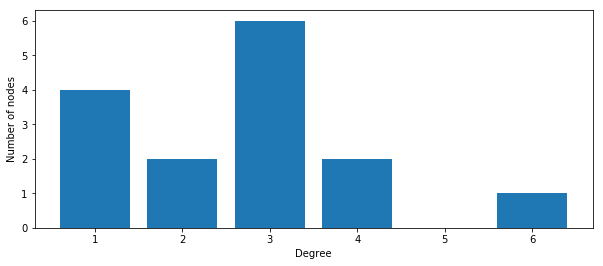

In [47]:
plt.figure(figsize=(10, 4))
plt.bar(plot_degrees.index, plot_degrees['nodes']) # degree
plt.xlabel('Degree')
plt.ylabel('Number of nodes')

**Eccentricity**   
Of a node v is the maximum distance from v to all other nodes in G.

The **diameter** is the maximum eccentricity.

In [48]:
nx.diameter(g)

5

The **radius** is the minimum eccentricity.

In [49]:
nx.radius(g)

3

The **center** is the set of nodes with eccentricity equal to radius.

In [50]:
nx.center(g)

['Medici', 'Ridolfi', 'Tornabuoni', 'Albizzi']

The **dijkstra** method to find the shortest path between two nodes 

In [51]:
dijkstra = nx.dijkstra_path(g,'Barbadori','Lamberteschi')

In [52]:
dijkstra

['Barbadori', 'Medici', 'Tornabuoni', 'Guadagni', 'Lamberteschi']

## Small famous graphs

#### Basic graphs
- nx.petersen_graph()
- nx.tutte_graph()
- nx.sedgewick_maze_graph()
- nx.tetrahedral_graph()
#### Classic graphs
- nx.complete_graph(5)
- nx.complete_bipartite_graph(3,5)
- nx.barbell_graph(10,10)
- nx.lollipop_graph(10,20)
#### Random graphs
- nx.erdos_renyi_graph(50,0.15)
- nx.watts_strogatz_graph(30,3,0.1)
- nx.barabasi_albert_graph(50,5)
- nx.random_lobster(50,0.9,0.9)